<a href="https://colab.research.google.com/github/Hyperionarc/U2/blob/master/Make_Money_with_Machine_Learning_Course_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment

Homework Assignment


Step 1 - Go to Yahoo Finance and find a stock price that you want to predict. Click on historical data, then download the CSV of that stocks price history https://finance.yahoo.com/quote/AAPL/history?p=AAPL

Step 2 - Use Scikit learn to try out 3 different types of regression models to predict the price of that stock for a future date. See this https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7 as an example and the scikit learn docs to see all the different types of regression models you can easily build (i.e quadratic, linear, lasso, ridge, etc.)

Step 3 - Visualize your result using matplotlib or another plotting library of your choice

# Step 1: Download data from Yahoo Finance

In [0]:
# numpy for matrix math & data pre-processing
import numpy as np

# numpy for matrix math & data pre-processing
import numpy as np

# pandas for data formatting
import pandas as pd

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [0]:
# yfinance library to access yahoo finance
!pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.49-py2.py3-none-any.whl size=21546 sha256=e05a247eabf1697f58f1849d2f7f764363099fca31971d392c07511077220013
  Stored in directory: /tmp/pip-ephem-wheel-cache-h4k30jfg/wheels/73/58/85/60d5bb8e3072ea4b3a343ac37bc92e331c7ee6b266b91ce761
Successfully built yfinance


In [0]:
# pdr for reading csv files
from pandas_datareader import data as pdr
# yf for reading into pandas
import fix_yahoo_finance as yf

# override pandas datareader
yf.pdr_override()

In [0]:
# read stock ticker data into a data frame, reset the index
ticker = 'AMZN'

dataframe = pdr.get_data_yahoo(ticker, start='2014-01-01').reset_index()
dataframe.to_csv(ticker + ".csv", index=False)

[*********************100%***********************]  1 of 1 downloaded


In [0]:
dataframe = pd.read_csv(ticker + ".csv")

In [0]:
# display first 5 rows
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [0]:
# summary of dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
Date         1468 non-null object
Open         1468 non-null float64
High         1468 non-null float64
Low          1468 non-null float64
Close        1468 non-null float64
Adj Close    1468 non-null float64
Volume       1468 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 80.4+ KB


In [0]:
# numerical summary of dataframe
dataframe.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1.468000e+03
mean,962.099516,970.975232,951.463287,961.686288,961.686288,4.206960e+06
std,558.651249,563.591646,552.185198,558.135099,558.135099,2.308967e+06
min,284.399994,290.420013,284.000000,286.950012,286.950012,1.091200e+06
25%,434.774994,438.637504,431.142494,434.315010,434.315010,2.739625e+06
50%,793.964997,799.470001,786.920013,795.945007,795.945007,3.594150e+06
75%,1566.997498,1584.925018,1546.142517,1572.214966,1572.214966,4.857500e+06
max,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010,2.385610e+07


In [0]:
dataframe.drop(['Open', 'High', 'Low', 'Close'], axis = 1, inplace = True)

In [0]:
# add technical indicators
dataframe['MA 9'] = dataframe['Adj Close'].rolling(9).mean().shift()
dataframe['MA 21'] = dataframe['Adj Close'].rolling(21).mean().shift()
dataframe['Change'] = np.log( dataframe['Adj Close'] / dataframe['Adj Close'].shift() )
dataframe['Volatility'] = dataframe.Change.rolling(21).std().shift()

In [0]:
# backfill missing values from moving averages
dataframe.dropna(axis = 0, inplace = True)

In [0]:
# preview
dataframe.head(30)

,Date,Adj Close,Volume,MA 9,MA 21,Change,Volatility
22,2014-02-04,347.950012,4812900,384.974447,392.395716,0.005187,0.031506
23,2014-02-05,346.450012,4435400,378.686669,390.086669,-0.004320,0.031608
24,2014-02-06,354.589996,3335700,372.751116,387.840002,0.023224,0.031609
25,2014-02-07,361.079987,4330500,369.083337,385.771431,0.018137,0.032046
26,2014-02-10,360.869995,3449700,366.283335,383.826667,-0.000582,0.032298
27,2014-02-11,361.790009,3222100,362.554447,381.915238,0.002546,0.032307
28,2014-02-12,349.250000,6587700,360.064446,380.207143,-0.035276,0.032338
29,2014-02-13,357.200012,4175000,354.091112,378.220000,0.022508,0.032933
30,2014-02-14,357.350006,3520200,353.925557,376.299048,0.000420,0.033153
31,2014-02-18,353.649994,4998000,355.170003,374.464762,-0.010408,0.033175


In [0]:
dataframe.to_csv(ticker + "_prepared.csv", index=False)

# Step 2: Stock price prediction

In [0]:
# read in a copy of csv and convert Date from string to datetime
df_full = pd.read_csv(ticker + "_prepared.csv", parse_dates=['Date'])

In [0]:
# import datetime to convert date to ordinal
import datetime as dt

df_full['Date'] = df_full['Date'].apply(lambda x: x.toordinal())

In [0]:
# to convert back to datetime
# df_full['Date'].apply(dt.datetime.fromordinal)

Separation of data features (X) from the value we want to predict aka labels (y)

In [0]:
X = df_full.drop('Adj Close', axis = 1)

In [0]:
y = df_full['Adj Close']

In [0]:
# testing ratio of 90%
train_ratio = 0.90

# training size
train_size = int(len(X) * train_ratio)

In [0]:
# split X and y into training and testing sets
X_train, X_test = X.loc[:train_size-1], X.loc[train_size:]
y_train, y_test = y.loc[:train_size-1], y.loc[train_size:]

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


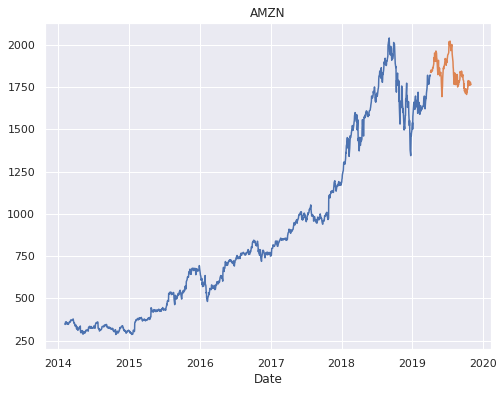

In [0]:
# create plot with dimension 8 x 6
f, ax = plt.subplots(figsize=(8,6))

# plot the dataframe, Date as x axis, Adj Close as y axis
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = y_train.values)
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = y_test.values)
plt.title(ticker);

Training and Evaluation

1. Basic linear regression model

In [0]:
from sklearn.linear_model import LinearRegression

# LinearRegression constructor
lin_reg = LinearRegression()

# fit the training data and training labels
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# view 5 instances of the training data and labels
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]

# print the results
print('Predictions: ', lin_reg.predict(some_data))
print('Labels: ', list(some_labels))

Predictions:  [381.6935105  367.53498263 385.77195172 375.51798542 359.12517015]
Labels:  [347.950012, 346.450012, 354.589996, 361.079987, 360.869995]


2. Regression model's Root Mean Squared Error (RMSE)

In [0]:
from sklearn.metrics import mean_squared_error

# predict the value of the stock using the prepared features
y_preds = lin_reg.predict(X_train)

# calculate error from training labels and predictions
lin_mse = mean_squared_error(y_train, y_preds)

# take the square root
lin_rmse = np.sqrt(lin_mse)
lin_rmse

29.932743959462442

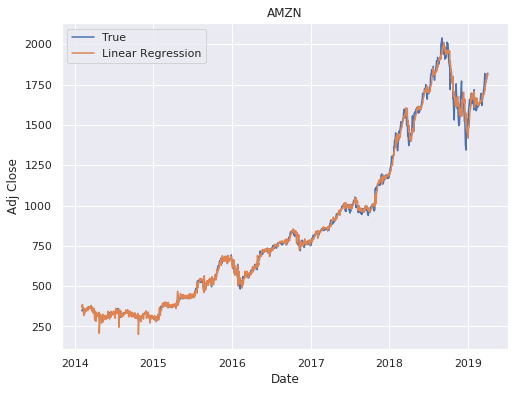

In [0]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = y_train, label = 'True')
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = y_preds, label = 'Linear Regression')
plt.title(ticker);

3. DecisionTreeRegressor

In [0]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree constructor
tree_reg = DecisionTreeRegressor()

# fit the prepared stock data and prices
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
# predict the stock prices using our decision tree model
price_preds = tree_reg.predict(X_train)

# calculate the error from the price and predictions
tree_mse = mean_squared_error(y_train, price_preds)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

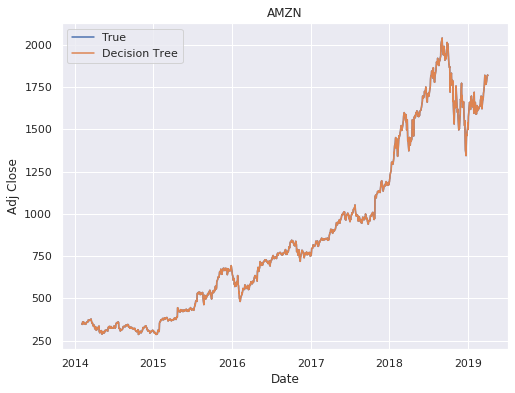

In [0]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = y_train, label = 'True')
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = price_preds, label = 'Decision Tree')
plt.title(ticker);

# Cross validation

In [0]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

# create 10 sequential splits from the training data
tscv = TimeSeriesSplit(n_splits = 5)

# calculate MSE scores
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = tscv)

# take square root
lin_reg_rmse_scores = np.sqrt(-lin_scores)

In [0]:
# function to display scores
def display_scores(scores):
  print('Scores: ', scores)
  print('Mean: ', scores.mean())
  print('Standard Deviation: ', scores.std())

# show linear regression scores
display_scores(lin_reg_rmse_scores)

Scores:  [43.53904575 18.35110687 15.39662538 35.77914678 60.63903182]
Mean:  34.74099131986167
Standard Deviation:  16.685471739590604


In [0]:
# calculate MSE scores
tree_scores = cross_val_score(tree_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = tscv)

# take square root
tree_reg_rmse_scores = np.sqrt(-tree_scores)

# show decision tree scores
display_scores(tree_reg_rmse_scores)

Scores:  [132.1239199   88.84280494 119.92556848 338.54188346 226.19876564]
Mean:  181.1265884825512
Standard Deviation:  91.07601147220026


Elastic net model for regularisation of our predictions

In [0]:
from sklearn.linear_model import ElasticNet

# training elastic net model
elastic_net = ElasticNet(alpha = .11, l1_ratio = .5)
elastic_net.fit(X_train, y_train)

# evaluate scores
elastic_scores = cross_val_score(elastic_net, X_train, y_train, scoring = 'neg_mean_squared_error', cv = tscv)
elastic_rmse_scores = np.sqrt(-elastic_scores)

training_preds = elastic_net.predict(X_train)

# display scores
display_scores(elastic_rmse_scores)

Scores:  [49.45855954 21.25144704 17.37810774 40.90094087 66.54745592]
Mean:  39.10730222339841
Standard Deviation:  18.189651780880364


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 742173.4556224269, tolerance: 32598.07340416307
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83364.32273921251, tolerance: 1519.5287668409558
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119038.79133132144, tolerance: 4076.0133489161226
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 276800.804676

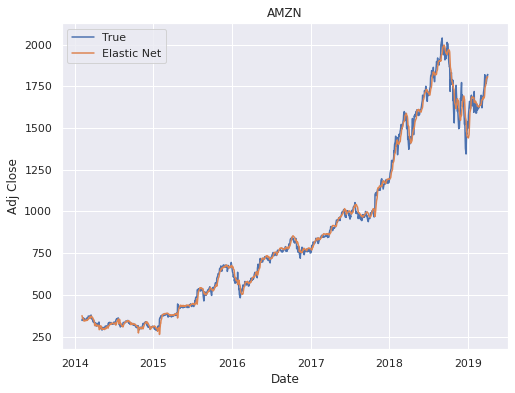

In [0]:
# plot
f, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = y_train, label = 'True')
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = training_preds, label = 'Elastic Net')
plt.title(ticker);

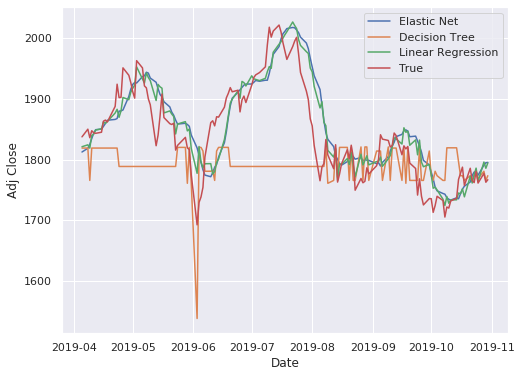

In [0]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = elastic_net.predict(X_test), label = 'Elastic Net')
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = tree_reg.predict(X_test), label = 'Decision Tree')
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = lin_reg.predict(X_test), label = 'Linear Regression')
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = y_test, label = 'True')

#  Auto ML

In [0]:
!pip install tpot

     |████████████████████████████████| 81kB 2.4MB/s 
     |████████████████████████████████| 153kB 7.1MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11955 sha256=b610d8718d5db921fd219a1b01140f0b8fe7e013d0f76ec775d0f88fd7d3d7f4
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [0]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations = 100, population_size = 100, verbosity = 2, cv = tscv, max_eval_time_mins = 480, n_jobs = -1)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_fitted_pipeline.py')

Generation 1 - Current best internal CV score: -1475.1562008468895
Generation 2 - Current best internal CV score: -1466.693071789146
Generation 3 - Current best internal CV score: -1466.693071789146
Generation 4 - Current best internal CV score: -1436.8571749519015
Generation 5 - Current best internal CV score: -1377.1460132533643
Generation 6 - Current best internal CV score: -1353.0847063597644
Generation 7 - Current best internal CV score: -1353.0847063597644
Generation 8 - Current best internal CV score: -1353.0847063597644
Generation 9 - Current best internal CV score: -1353.0847063597644
Generation 10 - Current best internal CV score: -1353.0847063597644
Generation 11 - Current best internal CV score: -1254.7147941382664
Generation 12 - Current best internal CV score: -1254.7147941382664
Generation 13 - Current best internal CV score: -1254.7147941382664
Generation 14 - Current best internal CV score: -1247.6636875700256
Generation 15 - Current best internal CV score: -1183.38065

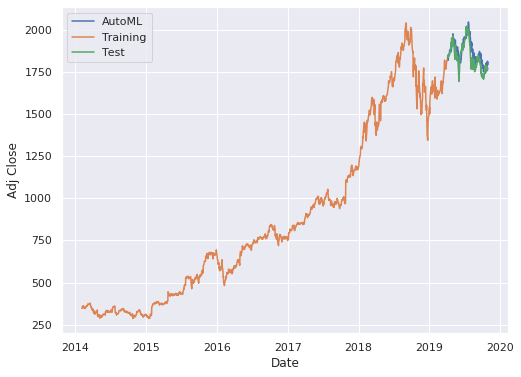

In [47]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = tpot.fitted_pipeline_.predict(X_test), label = 'AutoML')
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = y_train, label = 'Training')
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = y_test, label = 'Test')

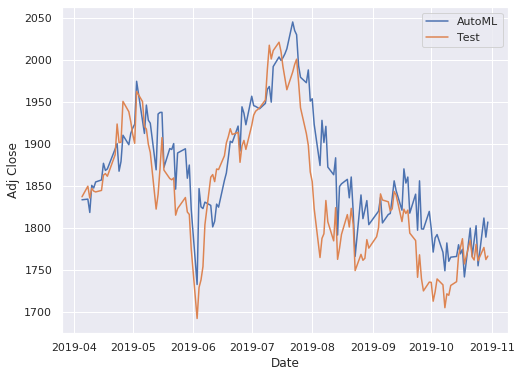

In [48]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = tpot.fitted_pipeline_.predict(X_test), label = 'AutoML')
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = y_test, label = 'Test')